In [ ]:
import torch
import matplotlib.pyplot as plt
import networks
from visualize_utils import *
import utils
import layers

In [2]:
encoder = networks.ResnetEncoder(18, False).to(torch.device("cuda"))
decoder = networks.DecomposeDecoder(encoder.num_ch_enc).to(torch.device("cuda"))
image_loader = ImageLoader(1, 1)
image = image_loader.single(1)

/home/zhouy/miniconda3/lib/python3.13/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/home/zhouy/miniconda3/lib/python3.13/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [4]:
feats = encoder(image)
outputs = decoder(feats, image)

tensor([1.1841], device='cuda:0')


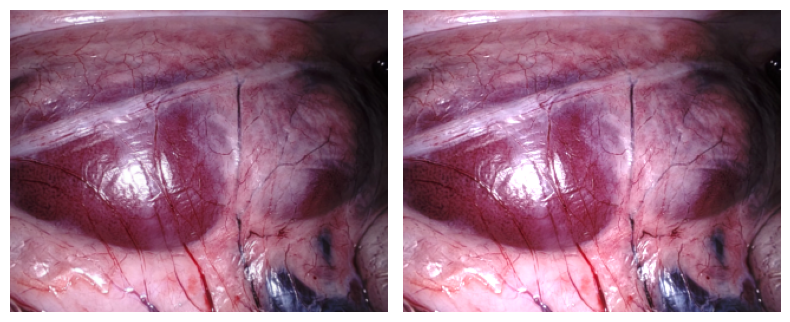

In [70]:
factor_choicer = utils.FactorChoicer(1, "cuda")
factor = factor_choicer.get_factor(-1)
enhanced = utils.enhance_brightness_torch(image, factor)
print(factor)
plot_images([image, enhanced])